<a href="https://colab.research.google.com/github/surabhi-joshi4/Automated_Multiple_Face_Recognition_AI/blob/master/Automated_Multiple_Face_Recognition_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cmake dlib face_recognition numpy opencv-python

In [ ]:
!pip install opencv-python

In [ ]:
from google.colab import drive
drive.mount('/gdrive/')

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).


In [ ]:
%cd/gdrive/My Drive/face_detection

/gdrive/My Drive/face_detection


In [ ]:
ls

 faces/          test1.jpg   test3.jpg   test5.jpg
'test (1).jpg'   test2.jpg   test4.jpg   test.jpg


In [ ]:
!pip install face_recognition

In [ ]:
import face_recognition as fr
import cv2
import os,shutil
import numpy as np
from google.colab.patches import cv2_imshow
import pandas as pd

In [ ]:
#function for encoding the images
def get_encoded_faces():
  encoded={}
  for dirpath,dname,fname in os.walk("./faces"):
    for f in fname:
      if f.endswith(".jpg") or f.endswith(".png"):
        face=fr.load_image_file("faces/"+f)
        encoding=fr.face_encodings(face)[0]
        encoded[f.split(".")[0]]=encoding
  return encoded 


In [ ]:
x=get_encoded_faces()

In [ ]:
x

{'bill gates': array([-1.09242789e-01,  8.21418688e-02,  7.65005052e-02,  6.61844909e-02,
        -1.28447220e-01, -1.63727067e-02, -3.78345400e-02, -1.36183247e-01,
         7.96160772e-02, -7.91553110e-02,  1.51076883e-01, -3.59641388e-03,
        -2.94623017e-01, -4.50880341e-02, -3.35343927e-03,  9.38964114e-02,
        -1.39286101e-01, -2.60703359e-02, -1.32537678e-01, -1.34456187e-01,
        -7.26950467e-02,  4.36590090e-02,  9.14684534e-02, -5.10342084e-02,
        -1.27527982e-01, -2.26599604e-01, -1.22815788e-01, -1.44408152e-01,
         9.78628248e-02, -7.78549910e-02,  5.95754609e-02,  7.56762326e-02,
        -1.51305482e-01, -6.27584308e-02, -4.00074422e-02,  1.29633024e-01,
        -6.25612140e-02, -2.44695693e-04,  2.06270322e-01, -5.42277955e-02,
        -1.53745309e-01,  2.16158703e-02,  3.60562876e-02,  2.58191288e-01,
         2.49448314e-01,  2.66997628e-02, -2.11072117e-02, -4.87494469e-02,
         1.47649214e-01, -2.88828075e-01,  6.55567050e-02,  1.13887683e-01

In [ ]:
def classify_face(im):
    
    faces = get_encoded_faces()
    faces_encoded = list(faces.values())
    known_face_names = list(faces.keys())

    img = cv2.imread(im, 1)
    #img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
    #img = img[:,:,::-1]
 
    face_locations = fr.face_locations(img)
    unknown_face_encodings = fr.face_encodings(img, face_locations)

    face_names = []
    for face_encoding in unknown_face_encodings:
        # See if the face is a match for the known face(s)
        matches = fr.compare_faces(faces_encoded, face_encoding)
        name = "Unknown"

        # use the known face with the smallest distance to the new face
        face_distances = fr.face_distance(faces_encoded, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]

        face_names.append(name)

        for (top, right, bottom, left), name in zip(face_locations, face_names):
            # Draw a box around the face
            cv2.rectangle(img, (left-20, top-20), (right+20, bottom+20), (255, 0, 0), 2)

            # Draw a label with a name below the face
            cv2.rectangle(img, (left-20, bottom -15), (right+20, bottom+20), (255, 0, 0), cv2.FILLED)
            font = cv2.FONT_HERSHEY_DUPLEX
            cv2.putText(img, name, (left -20, bottom + 15), font, 1.0, (255, 255, 255), 2)


    # Display the resulting image
    while True:

        cv2_imshow(img)
        return face_names     

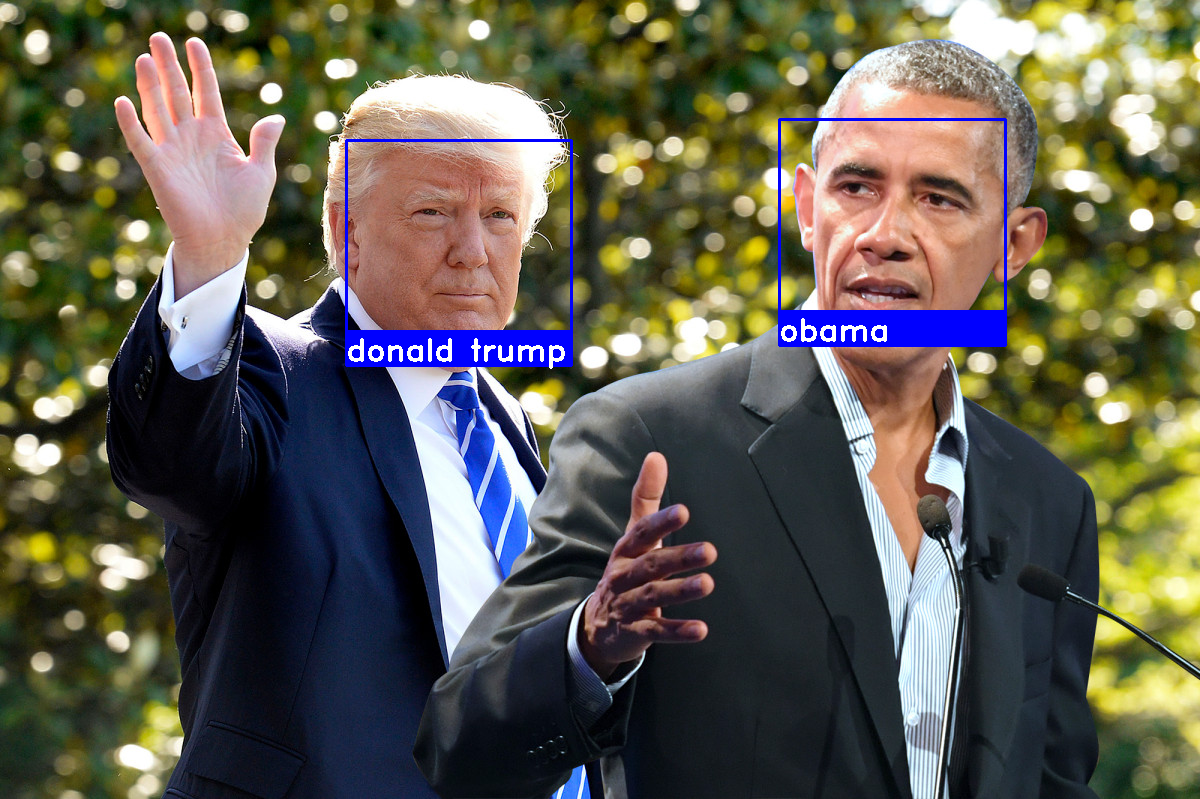

['obama', 'donald trump']

In [ ]:
classify_face("test1.jpg")

In [ ]:
def learning(image):
  c_face =classify_face(image)
  if 'Unknown' in c_face:
    que = input("There is an Unknown Face Would You like Add it to system ")
    if que == 'yes' or que == "Yes":
      imageFileName = input("enter the name of the image file: ")
      shutil.move(imageFileName, '/gdrive/My Drive/face_detection/faces')
      print(learning(image))
    else:
      print(c_face)
  else:
    print(c_face)


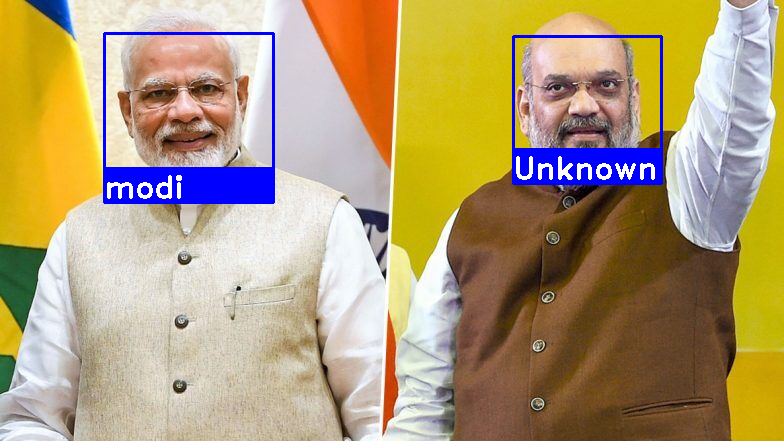

There is an Unknown Face Would You like Add it to system yes
enter the name of the image file: Amit shah.jpg


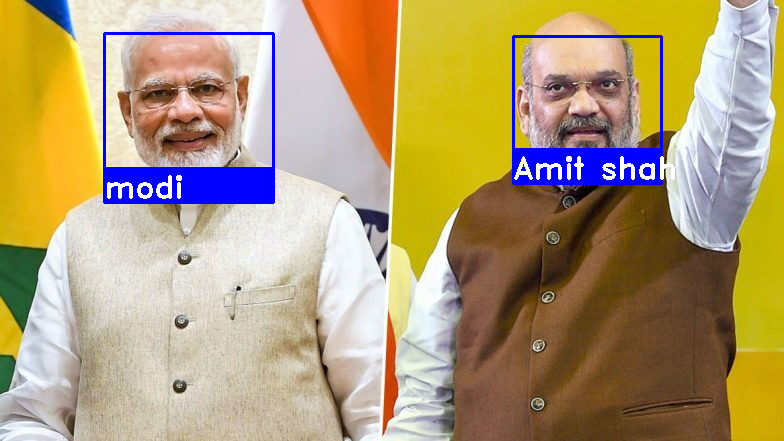

['Amit shah', 'modi']
None


In [ ]:
learning("test7.jpg")